<a href="https://colab.research.google.com/github/emilianog4/Data-Science-Projects/blob/main/An%C3%A1lisis_y_visualizaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis y visualización de datos

En este último _notebook_ nos adentraremos en la práctica habitual de la Ciencia de Datos, con algunas pinceladas conceptuales propias de la Estadística. Pondremos en práctica todo lo estudiado en la materia, y agregaremos algunas herramientas de visualización y buenas prácticas para la comunicación de resultados.

Vamos a trabajar con la **encuesta de salarios de Sysarmy**. ¿La conocés? Vamos a ver de qué se trata. Pero, antes, un poco de contexto.

![picture](https://drive.google.com/uc?export=view?&id=15Db4bVmMLkIPF5XIL8zw5JNndPXeBVcx)

**Openqube**, una plataforma colaborativa en la que empleados y ex empleados  brindan información de calidad sobre las empresas IT, desde 2014 lleva a cabo encuestas salariales dentro de la comunidad tecnológica y publica los resultados en el blog de **Sysarmy**. Por si no lo sabías aún, Sysarmy es la comunidad de sistemas que nuclea a profesionales del área para favorecer el contacto y el intercambio de conocimiento de manera informal.

Muy famosa es la **encuesta de sueldos**, que permite tener un panorama de la situación de empleo de miles de profesionales del mundo IT. Los resultados de la encuesta del primer trimestre de 2025 se encuentran [acá](https://sueldos.openqube.io/encuesta-sueldos-2025.01/).

Nuestro trabajo de la semana consiste en realizar un análisis de datos de este estilo, similar a lo que comunican Sol Espain y Rodrigo Díaz en [esta charla](https://youtu.be/heXneiyCqaQ).

En particular, en este _notebook_ vamos a trabajar con los resultados de la encuesta del segundo trimestre de 2020, ya que el Trabajo de Simulación de esta semana será replicar (¡y ampliar!) este análisis para el de la encuesta del primer trimestre de 2025. Como en todos nuestros trabajos de simulación, tendremos algunas preguntas importantes para tratar de responder. Por ejemplo:

*  ¿Hay diferencias significativas en el sueldo medio del mundo IT en función del _seniority_?
*  ¿O del tipo de lenguaje usado con mayor frecuencia?
*  ¿O entre géneros?
*  ¿O entre CABA y el resto del país?
*  ¿O entre el primer trimestre de 2025 y el primer trimestre de 2024, si tomamos alguna conversión de paridad de poder adquisitivo?

Pero lo más importante será que cada grupo pueda elegir qué preguntarse a partir de los datos y tratar de dar una respuesta fundamentada con todo lo que hemos estudiado.


## Encuesta de salarios del segundo trimestre de 2020

Durante todo este _notebook_ trabajaremos con la librería `pandas`, que contiene funciones y herramientas útiles para trabajar con _datasets_ en `Python`. Usaremos la librería `seaborn` para los gráficos estadísticos y el módulo `stats` de la librería `scipi` para cuando trabajemos con el coqueteo inferencial.

In [ ]:
# Librerías
import io
import pandas as pd

pd.set_option('display.max_rows', 10)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### Carga de datos

Vamos a comenzar cargando los datos. Hay varias formas de hacerlo, pero vamos a describir dos.

Por ejemplo, podemos cargar el archivo `Sysarmy-2020-2.csv` (que podés descargar [acá](https://drive.google.com/file/d/15G-D3QPJ42FAqbKio6mYwERQrqSKgin_/view?usp=sharing)) con la siguiente instrucción. Solo necesitás elegir el archivo y subirlo.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sysarmy-2020-2.csv to Sysarmy-2020-2.csv


Luego, podés leer ese archivo con `pandas` usando `pd.read_csv()`. Guardá los datos en un _dataframe_, que es el entorno que usaremos para recuperar la información. En nuestro caso, el _dataframe_ se llamará `df`, aunque iremos reduciéndolo y filtrándolo según consideremos apropiado.

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Sysarmy-2020-2.csv']))
# Con esta instrucción imprimimos las primeras 10 filas del dataset
df[0:9]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
5,Hombre,25,Argentina,Ciudad Autónoma de Buenos Aires,1.0,0.0,0.0,0,Terciario,Incompleto,...,Jamás,Heterosexual,NaN,No,10001+,Producto basado en Software,8,8,"Clases de gimnasia online, Clases de idiomas, ...",NaN
6,Hombre,33,Argentina,Ciudad Autónoma de Buenos Aires,1.0,1.0,1.0,0,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,NaN,51-100,Producto basado en Software,7,7,"Capacitaciones y/o cursos, Clases de gimnasia ...",Mercado Libre
7,Hombre,23,Argentina,Provincia de Buenos Aires,0.0,0.0,0.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Producto basado en Software,8,10,Ninguna de las anteriores,"Globant, Accenture, Making Sense, Globalogic"
8,Hombre,40,Argentina,Entre Ríos,20.0,10.0,2.0,0,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,NaN,51-100,Otras industrias,4,2,Horarios flexibles,"Mercado Libre, Hexacta, Argeniss"


Otra forma, por ejemplo, es pasarle una URL en la que se ubique el archivo y pedirle que lea los datos desde allí. Este archivo se encuentra en la página académica personal de Milagro Teruel, docente de FaMaF UNC. Podemos, también, elegir cargarlo desde allí. Existen otras formas de cargar archivos, pero creemos que por ahora, con estas dos alternativas es más que suficiente.

In [ ]:
df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv')
# Con esta instrucción imprimimos las primeras 10 filas del dataset
df[0:9]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
5,Hombre,25,Argentina,Ciudad Autónoma de Buenos Aires,1.0,0.0,0.0,0,Terciario,Incompleto,...,Jamás,Heterosexual,NaN,No,10001+,Producto basado en Software,8,8,"Clases de gimnasia online, Clases de idiomas, ...",NaN
6,Hombre,33,Argentina,Ciudad Autónoma de Buenos Aires,1.0,1.0,1.0,0,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,NaN,51-100,Producto basado en Software,7,7,"Capacitaciones y/o cursos, Clases de gimnasia ...",Mercado Libre
7,Hombre,23,Argentina,Provincia de Buenos Aires,0.0,0.0,0.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Producto basado en Software,8,10,Ninguna de las anteriores,"Globant, Accenture, Making Sense, Globalogic"
8,Hombre,40,Argentina,Entre Ríos,20.0,10.0,2.0,0,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,NaN,51-100,Otras industrias,4,2,Horarios flexibles,"Mercado Libre, Hexacta, Argeniss"


El _dataframe_ `df` que creamos tiene información de nuestros datos en filas y columnas.

*  Cada **fila** es un registro, es decir, una de las respuestas de la encuesta.
*  Cada **columna** es una variable. Algunas de esas variables son categóricas (como el género, el país o la ciudad), numéricas ordinales (como las de recomendación de la compañía), numéricas continuas (como el salario, la edad, la antigüedad en el puesto o los años de experiencia) o de otro tipo.

Con la instrucción `describe` podemos tener una rápida lectura de los estadísticos más importantes de cada una de las variables continuas del _dataframe_.

In [ ]:
df.describe()

,profile_age,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,salary_on_call_duty_charge,salary_monthly_BRUTO,salary_monthly_NETO,salary_satisfaction,salary_comparison_last_semester,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,company_recommended,company_diversity_policies
count,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6.095000e+03,5.883000e+03,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000
mean,41.181952,8.930861,3.311944,2.889770,2.211649,664.042084,1.240585e+05,9.490795e+04,2.619524,2.363577,10.444511,2.785562,7.340115,7.621001
std,665.721175,7.161094,4.367742,3.423228,32.983395,10540.523461,1.229124e+05,9.686226e+04,0.858621,0.945713,12.860433,2.837195,2.024057,2.324034
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,27.000000,3.000000,0.000000,1.000000,0.000000,0.000000,6.159500e+04,5.148000e+04,2.000000,2.000000,0.000000,0.000000,6.000000,6.000000
50%,31.000000,7.000000,2.000000,2.000000,0.000000,0.000000,9.600000e+04,7.800000e+04,3.000000,2.000000,7.000000,2.000000,8.000000,8.000000
75%,37.000000,13.000000,4.000000,4.000000,0.000000,0.000000,1.450000e+05,1.060000e+05,3.000000,3.000000,18.000000,6.000000,9.000000,10.000000
max,52000.000000,115.000000,43.000000,34.000000,2500.000000,650000.000000,2.180000e+06,2.080000e+06,4.000000,4.000000,100.000000,8.000000,10.000000,10.000000


### Exploración descriptiva inicial

Siempre que comenzamos un análisis de datos, es importante hacer una exploración descriptiva inicial, por ejemplo para:

*   Reconocer los tipos de variables presentes.
*   En el caso de variables numéricas, tener una idea de los rangos de variación que tienen.
*   Identificar si hay datos faltantes o mal codificados.
*   Empezar a buscar relaciones de interés entre variables.
*   Hacer gráficos exploratorios.

En lo que sigue, vamos a estudiar el comportamiento de algunas variables de interés e iniciar la fase de pre-procesamiento y limpieza de los datos para poder establecer algunas conjuteras sobre las hipótesis que surjan.

Comencemos por explorar la variable de género disponible en `profile_gender`. Como es sabido en el mundo IT, la muestra no es balanceada en términos del género femenimo y masculino.





In [ ]:
# Casos de hombres y mujeres en la encuesta
gender_counts = df['profile_gender'].value_counts()
gender_counts

Hombre    5122
Mujer      942
Otros       31
Name: profile_gender, dtype: int64

<Axes: >

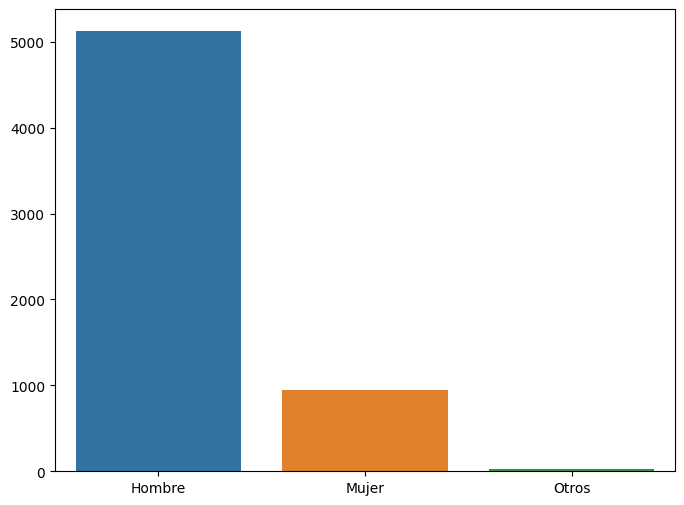

In [ ]:
# Gráfico de barras para ver la relación entre los géneros
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)

También podemos explorar gráficamente el comportamiento de los datos de la variable edad, disponible en `profile_age`.

<Axes: xlabel='profile_age'>

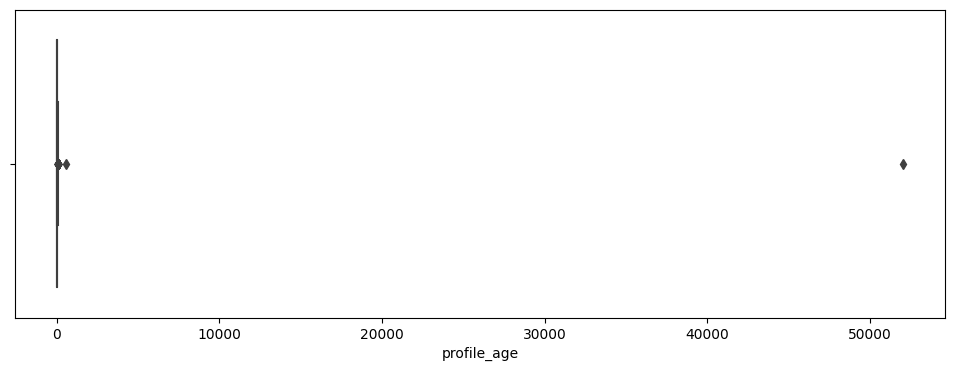

In [ ]:
# Boxplot de la variable edad
plt.figure(figsize=(12, 4))
sns.boxplot(x=df.profile_age) # Ocurre algo raro con la edad: se ve una edad mayor a 50.000

Como suele ocurrir al trabajar con cualquier conjunto de datos, puede haber errores en el registro. Por ejemplo, existe un caso de la muestra cuya edad reportada es superior a los 50.000 años. Naturalmente, esto corresponde a un error en la base de datos. Cuando identificamos casos como estos, que no caben dudas que son erróneos, es necesario removerlos para poder evitar que esos errores sesguen los análisis.

<Axes: xlabel='profile_age'>

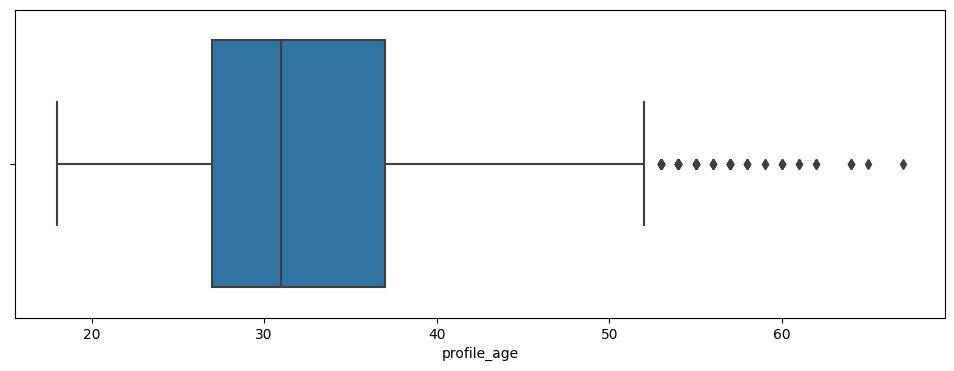

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df[df.profile_age < 100].profile_age) # Limitamos a registros de edades de menos de 100 años

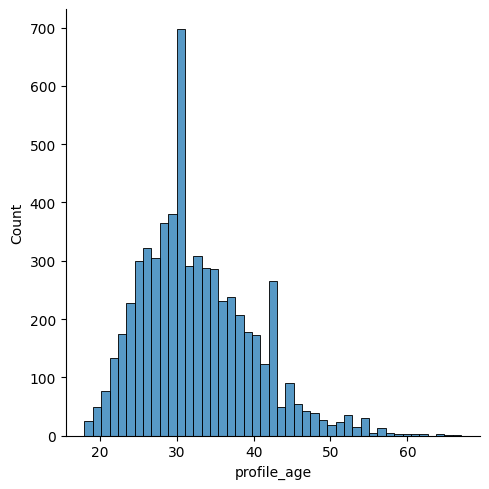

In [ ]:
# Gráfico de distribución de la variable edad
sns.displot(df[df.profile_age < 100].profile_age)

Podríamos, entonces, filtrar esos datos y continuar viendo, por ejemplo, cómo se distribuye la edad según el género.

<Axes: xlabel='profile_gender', ylabel='profile_age'>

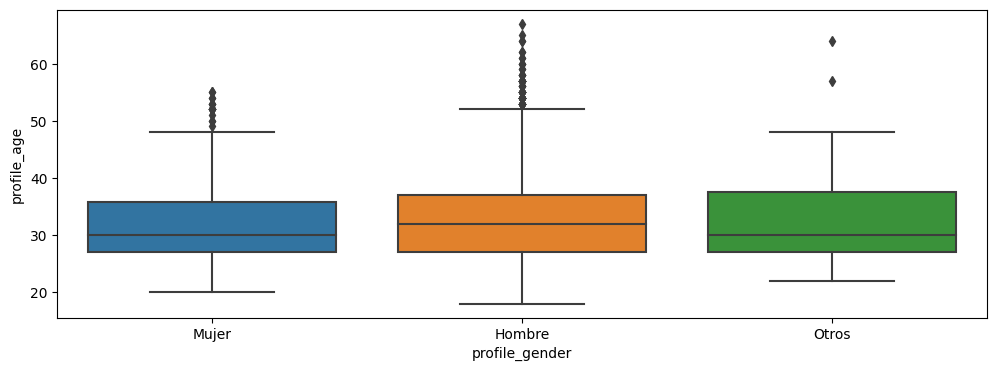

In [ ]:
# Dataset filtrado preliminar
filtered_df = df[df['profile_age'] < 100]

plt.figure(figsize=(12, 4))
sns.boxplot(x='profile_gender', y='profile_age', data=filtered_df)

Una variable de mucho interés en nuestro análisis es el **salario mensual bruto** disponible en `salary_monthly_BRUTO`.

<Axes: xlabel='salary_monthly_BRUTO'>

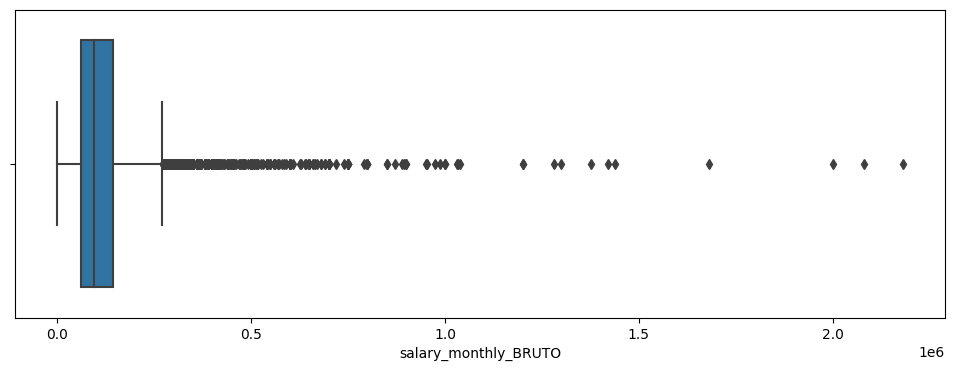

In [ ]:
# Boxplot del salario
plt.figure(figsize=(12, 4))
sns.boxplot(x=df.salary_monthly_BRUTO)

<Axes: xlabel='salary_monthly_BRUTO'>

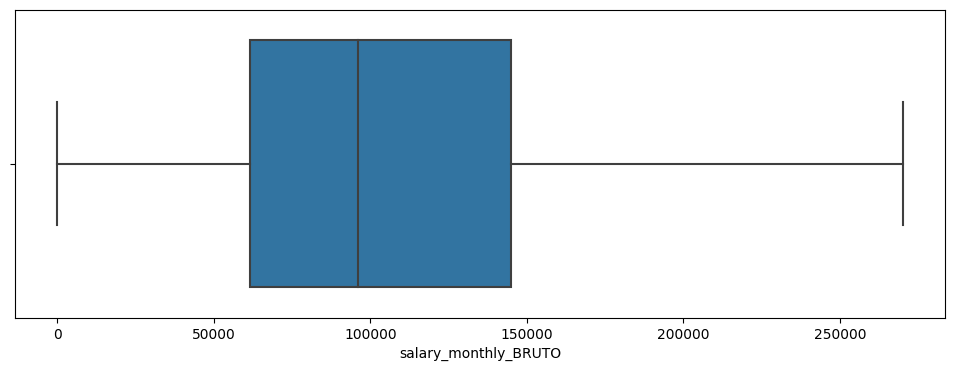

In [ ]:
# Acá excluimos las observaciones que se marcaron como outliers en el gráfico anterior
plt.figure(figsize=(12, 4))
sns.boxplot(x=df.salary_monthly_BRUTO, showfliers = False)

Veamos un histograma del salario mensual bruto y representemos la media y la mediana. En el segundo gráfico, tomamos los datos filtrados para salarios de menos de $200.000.

Es usual que la distribución del salario presente asimetría. Esto se observa, además, con la media y la mediana: como el salario es asimétrico a derecha, hay mucha concentración a izquierda, mostrando una "cola" de la distribución larga a derecha, pero con poco peso. Por eso, la media se ve traccionada a la derecha, superando a la mediana, que se mantiene a izquierda.

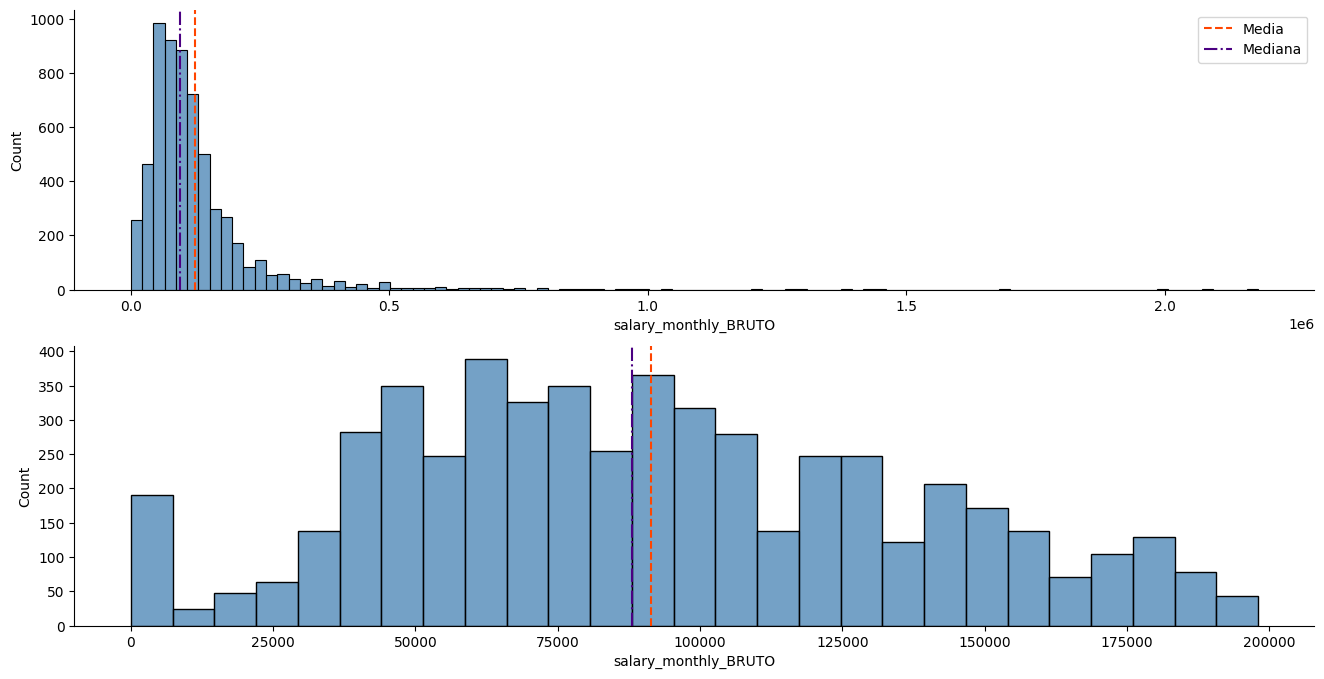

In [ ]:
# Hagamos dos gráficos en uno.
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))

# Primer gráfico
sns.histplot(df['salary_monthly_BRUTO'], bins=100, ax=axes[0], color='steelblue')
axes[0].axvline(df['salary_monthly_BRUTO'].mean(), color='orangered', linestyle='--', label='Media')
axes[0].axvline(df['salary_monthly_BRUTO'].median(), color='indigo',
            linestyle='-.', label='Mediana')

# Segundo gráfico, mismo histograma pero concentrando la visualización
# en la región de $0 a $200.000 (recordemos que el percentil 75 de estos datos
# es $145.000, es decir, en esta región estamos concentrando casi todos los datos)
filtered_df = df[df['salary_monthly_BRUTO'] < 200000]
sns.histplot(filtered_df['salary_monthly_BRUTO'], ax=axes[1], color='steelblue')
axes[1].axvline(filtered_df['salary_monthly_BRUTO'].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df['salary_monthly_BRUTO'].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()

sns.despine()

También podemos comparar la distribución de los salarios brutos con respecto al género o al nivel de estudios alcanzado o en curso. Eso es posible con boxplots apilados.

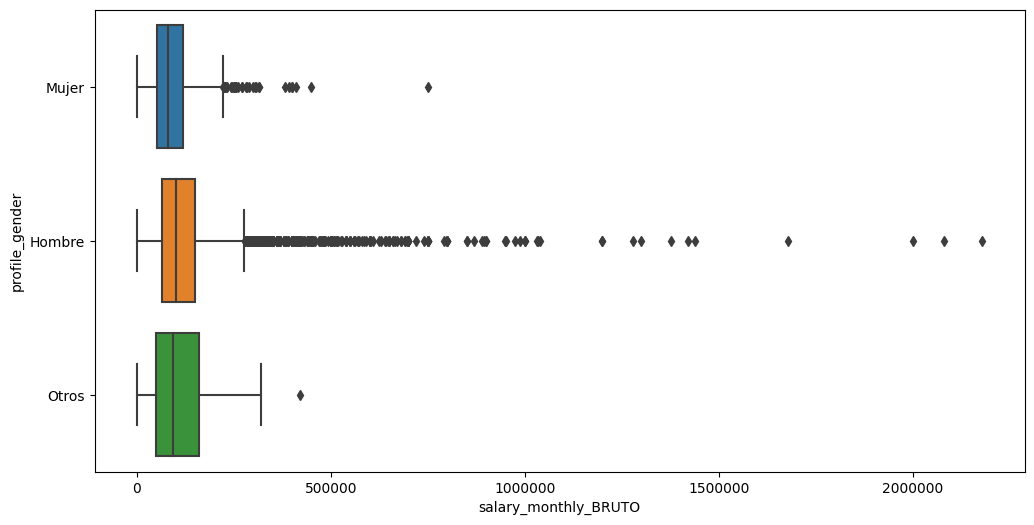

In [ ]:
# Boxplots apilados del salario bruto mensual por género
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='salary_monthly_BRUTO', y='profile_gender')
plt.ticklabel_format(style='plain', axis='x')

El salario se muestra más concentrado para el acso de las mujeres, mostrando cierta tendencia a izquierda respecto de los hombres. Por ejemplo, el salario mediano de las mujeres equivale, aproximadamente, al salario del primer cuartil masculino.

En cuanto al nivel de estudio, los boxplots exhiben una tendencia relativamente creciente en función del incremento del nivel educativo y, en general, mantienen la asimetría del salario sin filtrar por nivel.

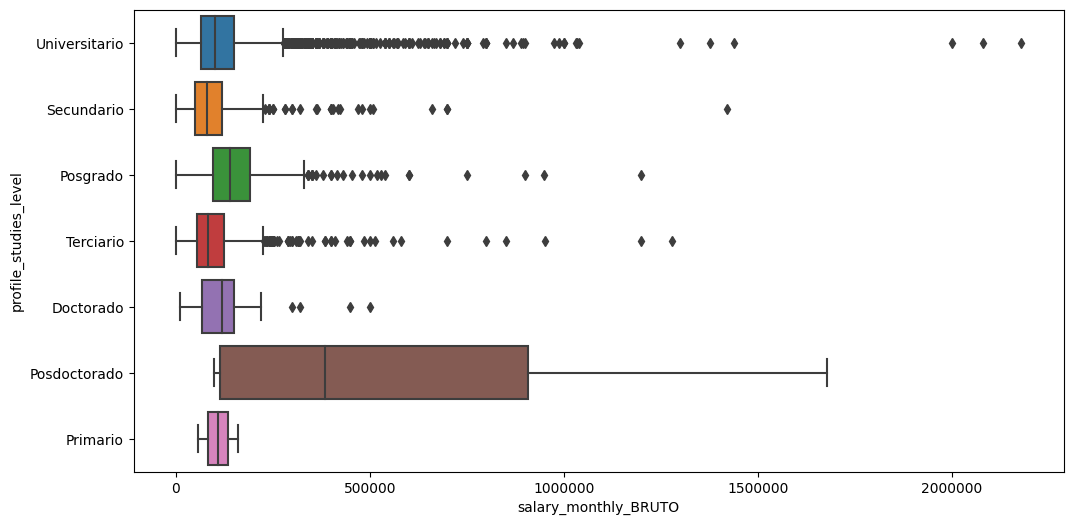

In [ ]:
# Boxplots apilados del salario bruto mensual por nivel de estudios
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='salary_monthly_BRUTO', y='profile_studies_level')
plt.ticklabel_format(style='plain', axis='x')

Los boxplot son útiles, pero tienen una gran desventaja: ocultan mucha información en la distribución de las colas.

Un gráfico más informativo es el *boxenplot*, que visualiza más percentiles. Otra ventaja es la percepción del mismo debido al peso visual de las cajas: los datos en el rango intercuartílico no parecen muuuucho más importantes que los datos en las colas.

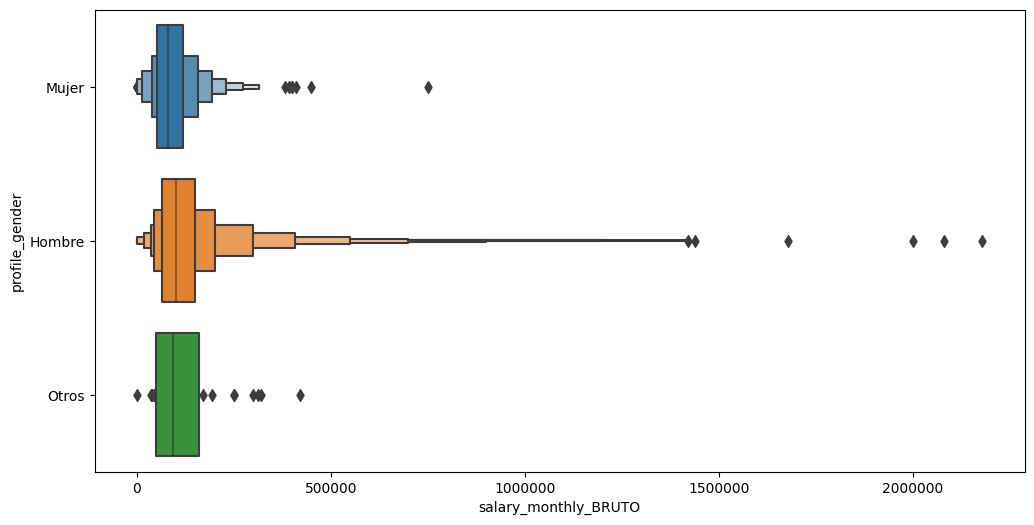

In [ ]:
# Boxenplots apilados del salario bruto mensual por género
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, x='salary_monthly_BRUTO', y='profile_gender')
plt.ticklabel_format(style='plain', axis='x')

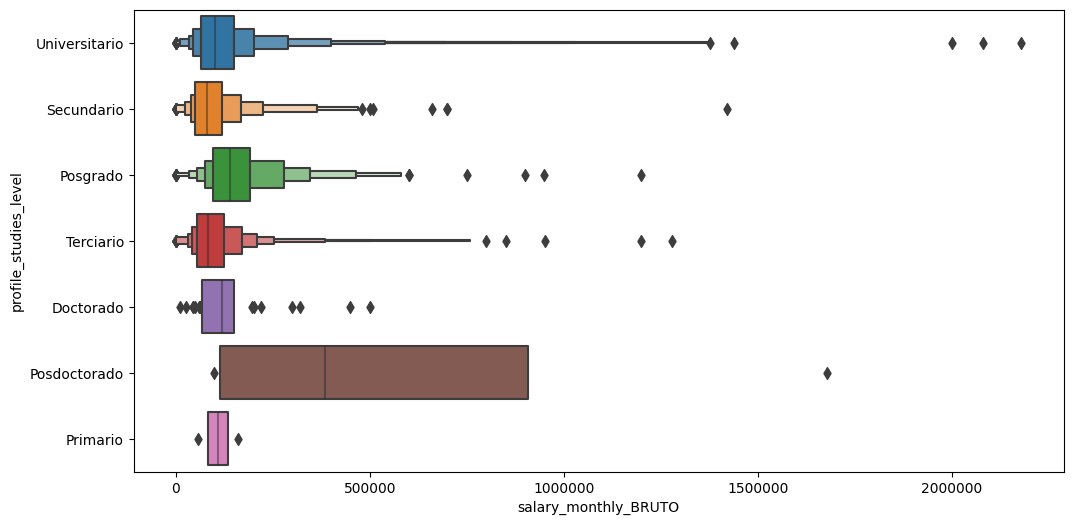

In [ ]:
# Boxenplots apilados del salario bruto mensual por nivel de estudios
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, x='salary_monthly_BRUTO', y='profile_studies_level')
plt.ticklabel_format(style='plain', axis='x')

También podemos tomar la decisión de eliminar valores extremos, que por alguna razón consideremos como atípicos y que, en caso de dejarlos, obturarían mucho el cálculo de promedios, que es una de las herramientas estadísticas más frecuentemente usada.

Algo así hicimos con la variable de la edad, pero en ese caso, era evidente que se trataba de un registro erróneo: ningún participante puede tener 50.000 años. Sin embargo, afirmar algo así en el caso de salarios es más difícil: en esta muestra, hay registros de usuarios que ganan más de 2.000.000 de pesos; una cifra, para ese entonces (2do trimestre de 2020) realmente llamativa. No podemos afirmar que casos como esos correspondan a errores de registro.

No obstante, siendo casos realmente minoritarios, podemos decidir excluirlos en aras de no sesgar estadísticos sensibles a estos valores extremos como la media o el desvío estándar.

Por ejemplo, podemos elegir quedarnos con el 98% de salarios más bajos, eliminando el 2% superior. Podemos calcular todos los percentiles para decidir cuál sería el más apropiado.

In [ ]:
# Algunos percentiles de interés
df['salary_monthly_BRUTO'].quantile([.95, .98, .99, .998])

0.950     307150.0
0.980     480000.0
0.990     630600.0
0.998    1032671.0
Name: salary_monthly_BRUTO, dtype: float64

Así vemos que el 98% de los encuestados tienen un salario bruto de $480.000 o menos.

<Axes: xlabel='salary_monthly_BRUTO'>

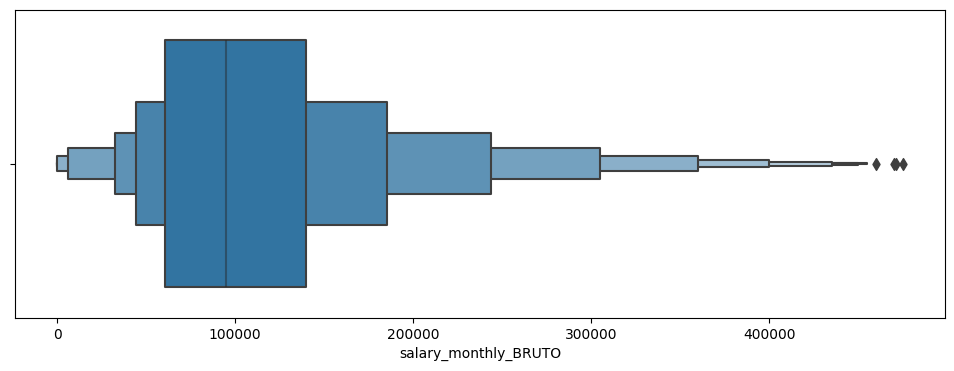

In [ ]:
plt.figure(figsize=(12, 4))
max_limit = df['salary_monthly_BRUTO'].quantile(.98) # Definimos este límite a ojo
sns.boxenplot(x=df[df['salary_monthly_BRUTO'] < max_limit]['salary_monthly_BRUTO']) # Nos quedamos con los datos reducidos a ese nuevo conjunto

Para lo que sigue, nos quedaremos con el dataset reducido a este conjunto.

<Axes: xlabel='salary_monthly_BRUTO'>

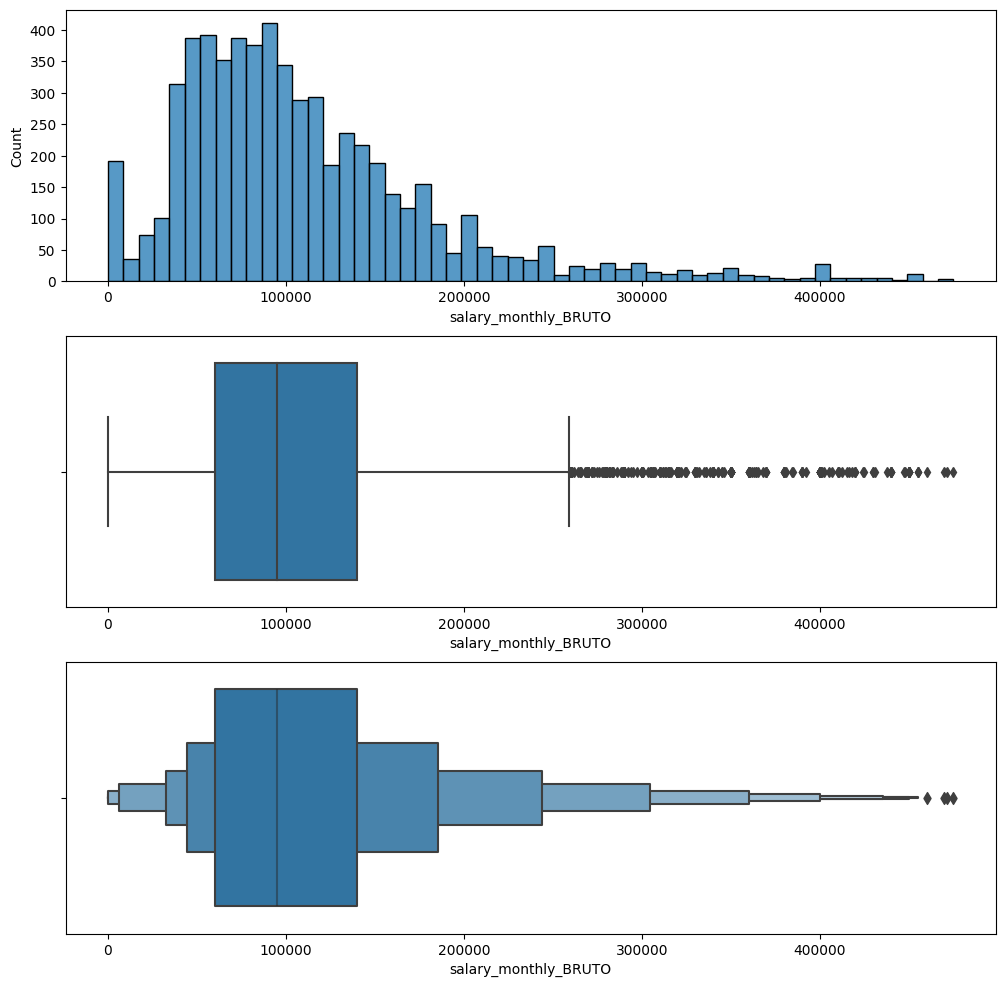

In [ ]:
# Histograma, boxplot y boxenplot de los nuevos datos
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
max_limit = df['salary_monthly_BRUTO'].quantile(.98)
data = df[df['salary_monthly_BRUTO'] < max_limit]['salary_monthly_BRUTO']
sns.histplot(x=data, ax=axes[0])
sns.boxplot(x=data, ax=axes[1])
sns.boxenplot(x=data, ax=axes[2])

Creamos el dataset reducido `df_red` quedándonos con 5968 registros, que corresponden a los encuestados que concentran el 98% de los salarios brutos mensuales más bajos. Es decir, excluimos al 2% de mayores salarios de la base de datos original y, también a los de la edad superior a 100 años que observamos antes.

In [ ]:
df_red = df[df['salary_monthly_BRUTO'] < max_limit]
df_red = df_red[df_red['profile_age'] < 100]
df_red

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.0,6.0,6.0,0,Terciario,Completado,...,En mi trabajo actual,Heterosexual,NaN,No,501-1000,Otras industrias,7,8,Viáticos,NaN
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.0,5.0,5.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Otras industrias,8,10,"Abono de celular, Capacitaciones y/o cursos, D...",NaN
6092,Hombre,24,Argentina,Ciudad Autónoma de Buenos Aires,2.0,2.0,2.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,NaN,201-500,Producto basado en Software,7,9,"Capacitaciones y/o cursos, Clases de idiomas, ...",Mercado Libre
6093,Hombre,28,Argentina,La Pampa,5.0,3.0,2.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,No,51-100,Servicios / Consultoría de Software / Digital,5,7,Capacitaciones y/o cursos,Solo Nubity


In [ ]:
df_red.describe()

,profile_age,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,salary_on_call_duty_charge,salary_monthly_BRUTO,salary_monthly_NETO,salary_satisfaction,salary_comparison_last_semester,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,company_recommended,company_diversity_policies
count,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5.767000e+03,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000
mean,32.536696,8.853234,3.321347,2.882900,1.701575,542.001759,111534.769595,8.634644e+04,2.597855,2.337466,10.554406,2.818197,7.312500,7.603385
std,7.268925,7.161516,4.370261,3.427007,7.355257,6446.522231,75321.657813,6.395366e+04,0.850167,0.932832,12.862230,2.835580,2.023417,2.325967
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,27.000000,3.000000,0.000000,1.000000,0.000000,0.000000,60445.250000,5.079100e+04,2.000000,2.000000,0.000000,0.000000,6.000000,6.000000
50%,31.000000,7.000000,2.000000,2.000000,0.000000,0.000000,95000.000000,7.600000e+04,3.000000,2.000000,8.000000,2.000000,8.000000,8.000000
75%,37.000000,13.000000,4.000000,4.000000,0.000000,0.000000,140000.000000,1.050000e+05,3.000000,3.000000,18.000000,6.000000,9.000000,10.000000
max,67.000000,115.000000,43.000000,34.000000,300.000000,300000.000000,475000.000000,1.600000e+06,4.000000,4.000000,100.000000,8.000000,10.000000,10.000000


Volvemos a mirar la distribución por género y por nivel de estudios alcanzado o en curso.

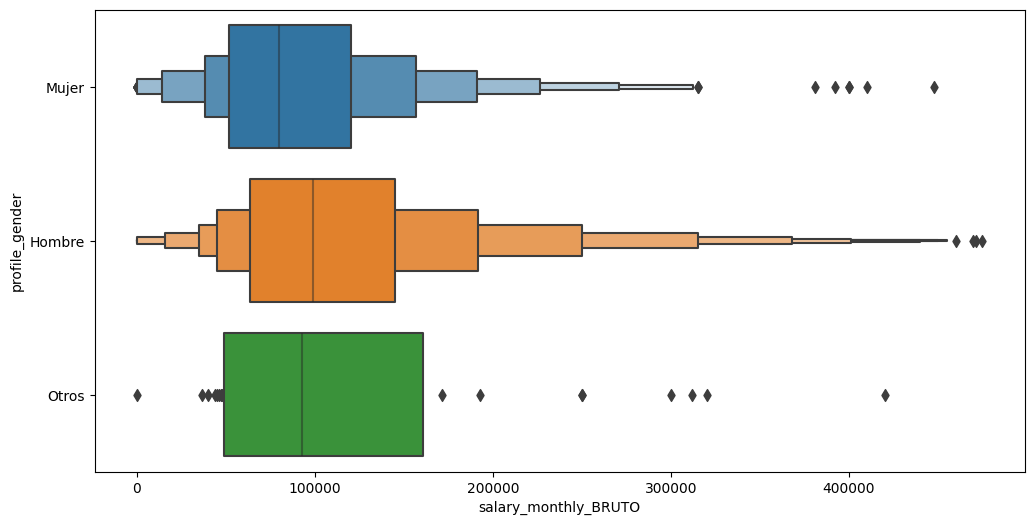

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df_red, x='salary_monthly_BRUTO', y='profile_gender')
plt.ticklabel_format(style='plain', axis='x')

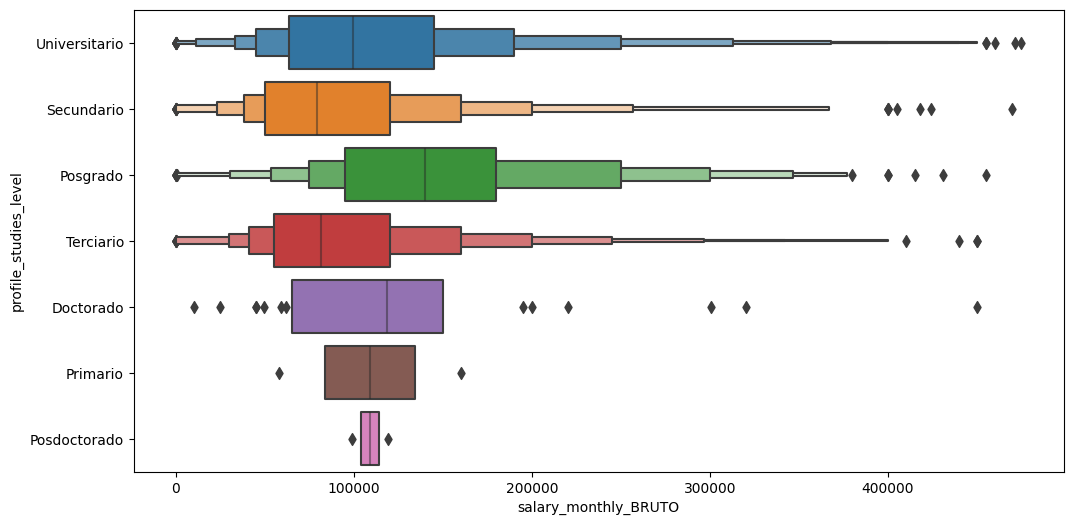

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df_red, x='salary_monthly_BRUTO', y='profile_studies_level')
plt.ticklabel_format(style='plain', axis='x')

Una tabla de contingencia permite ver, de forma desagregada, la cantidad de casos para el nivel de estudio según el género. Un mapa de calor puede ser útil para identificar visualmente la magnitud de la concentración de casos en cada celda.

In [ ]:
# Tabla de contingencia para ver nivel de estudios según género
pd.crosstab(df_red.profile_gender, df_red.profile_studies_level)#, normalize=True)

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario
profile_gender,,,,,,,
Hombre,18,2,245,2,417,959,3353
Mujer,8,0,85,0,24,158,666
Otros,3,0,1,0,1,7,19


<Axes: xlabel='profile_studies_level', ylabel='profile_gender'>

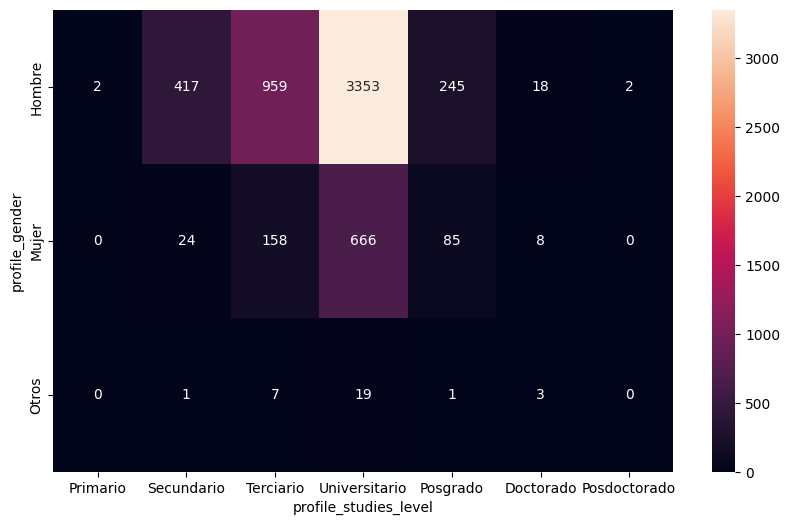

In [ ]:
# Mapa de calor de la tabla anterior
# Ordenamos los niveles para mejor lectura
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado']
fig = plt.figure(figsize=(10,6))
exp = pd.crosstab(df_red.profile_gender,
                  df_red.profile_studies_level)[sorted_studies_levels]
sns.heatmap(exp, annot=True, fmt='g')

Otra variable de interés en relación con el salario puede ser la cantidad de años de experiencia, dado que este conjunto de datos aun no incluía información sobre el `seniority`. Esa variable está disponible en `profile_years_experience`, y podemos hacer un gráfico como el que sigue. Las barras verticales negras en este tipo de gráficos son conocidas como 'barras de error' y dan una idea de la precisión de la medición. En este caso NO las interpretaremos, pero haremos algo similar cuando enfrentemos la etapa de conjeturas e hipótesis.

<Axes: xlabel='profile_years_experience', ylabel='salary_monthly_BRUTO'>

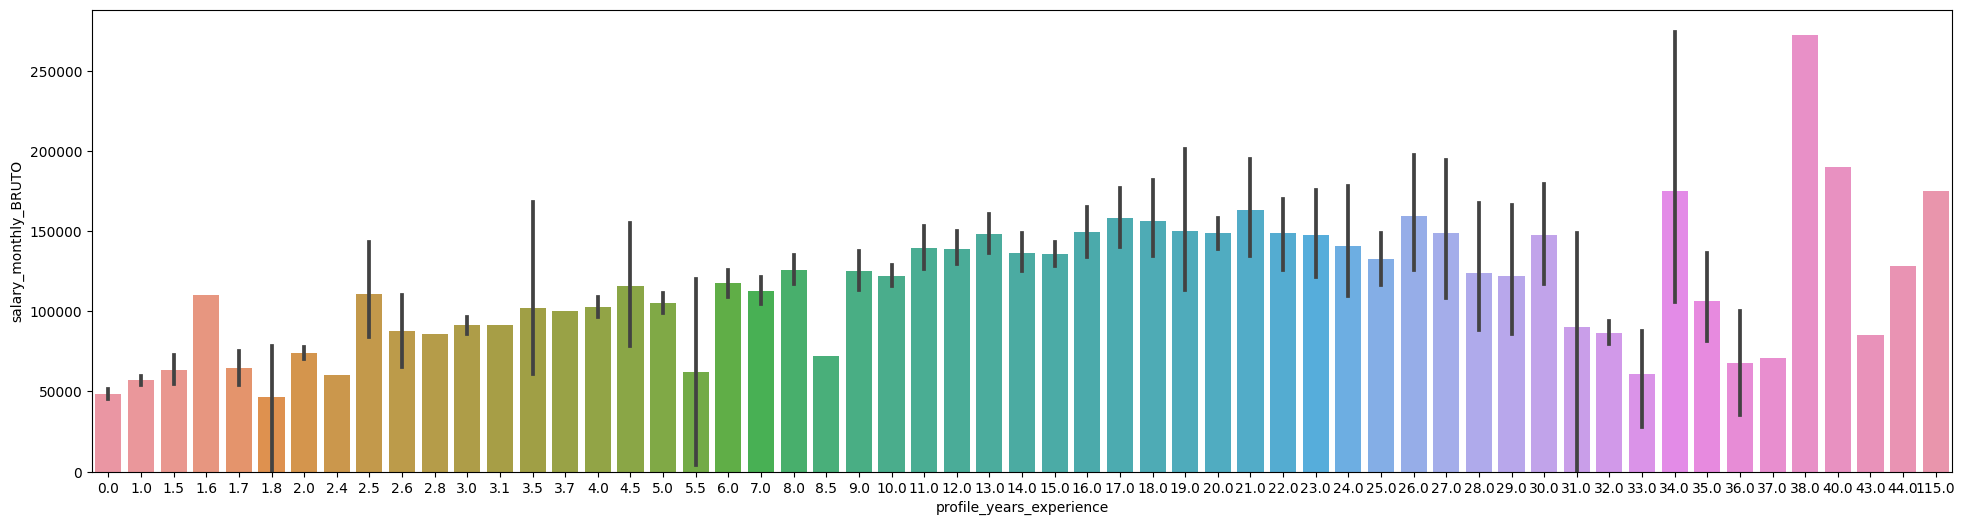

In [ ]:
plt.figure(figsize=(24, 6))
sns.barplot(x='profile_years_experience', y='salary_monthly_BRUTO', data=df_red)

Nuevamente aparece un problema de registro, con un usuario de más de 100 años de experiencia. Podemos elegir limitar el análisis para casos de menos de 40 años de experiencia.

<Axes: xlabel='profile_years_experience', ylabel='salary_monthly_BRUTO'>

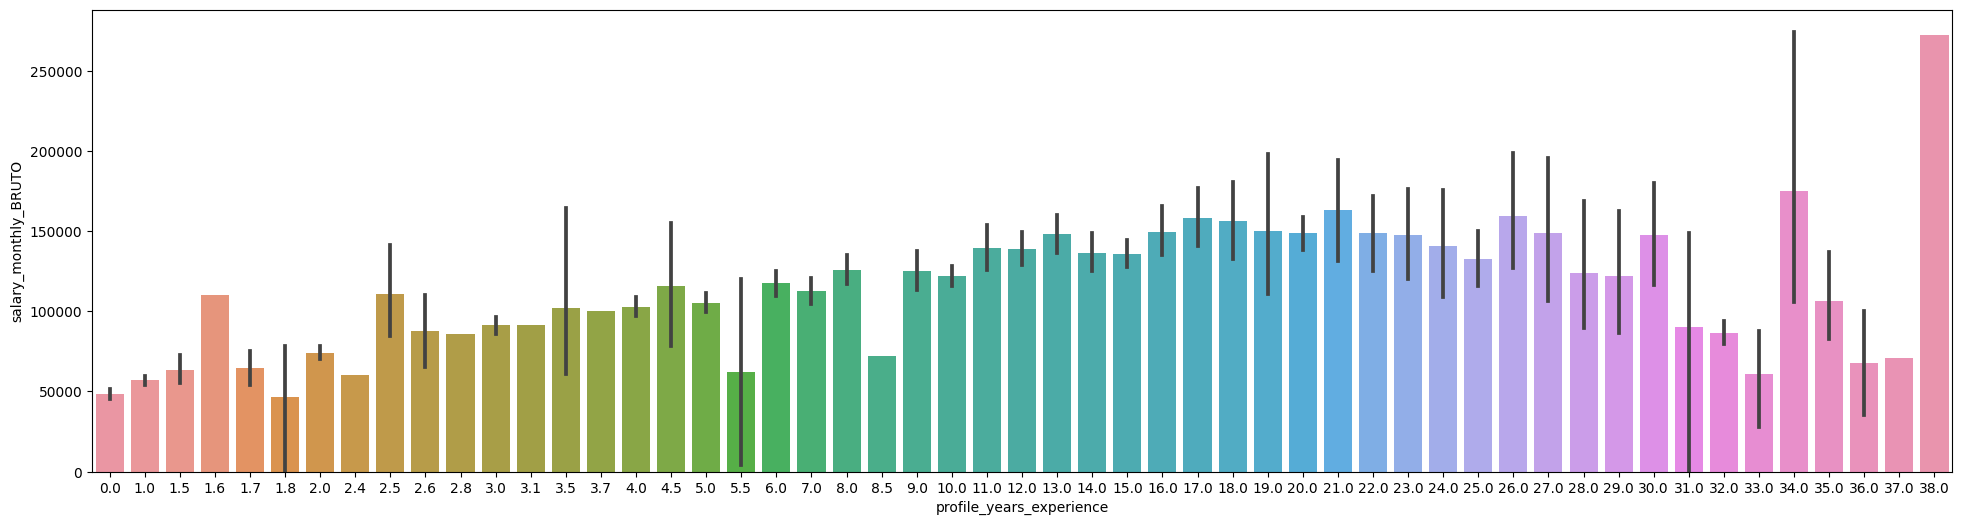

In [ ]:
df_red = df_red[df_red['profile_years_experience'] < 40]
plt.figure(figsize=(24, 6))
sns.barplot(x='profile_years_experience', y='salary_monthly_BRUTO', data=df_red)

También podemos relacionar esa variable con la de la edad de los individuos, viendo una tendencia creciente razonable. Este gráfico también puede ayudar a encontrar datos mal registrados: por ejemplo, una persona de menos de 30 años no debería tener mucho más de 10 años de experiencia.


<Axes: xlabel='profile_years_experience', ylabel='profile_age'>

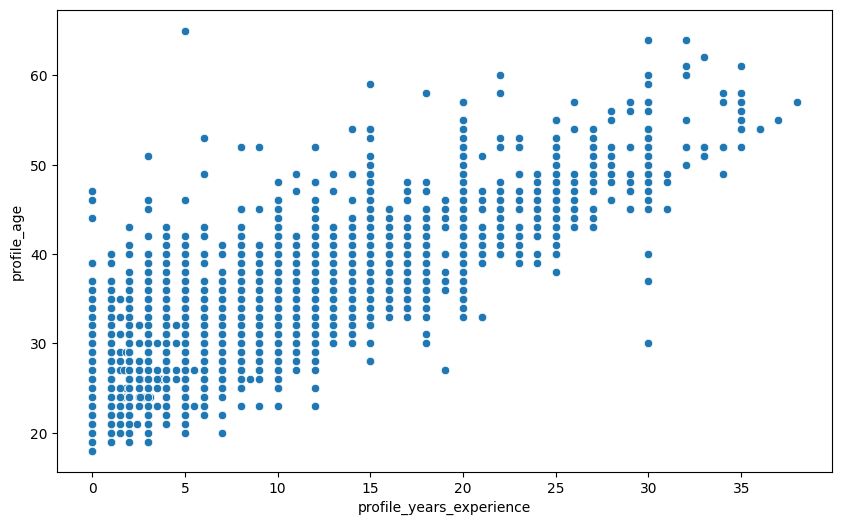

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='profile_years_experience', y='profile_age', data=df_red)

<ipython-input-34-64491278fae2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['dif_age_yearsexp'] = df_red['profile_age']-df_red['profile_years_experience']


<Axes: xlabel='dif_age_yearsexp'>

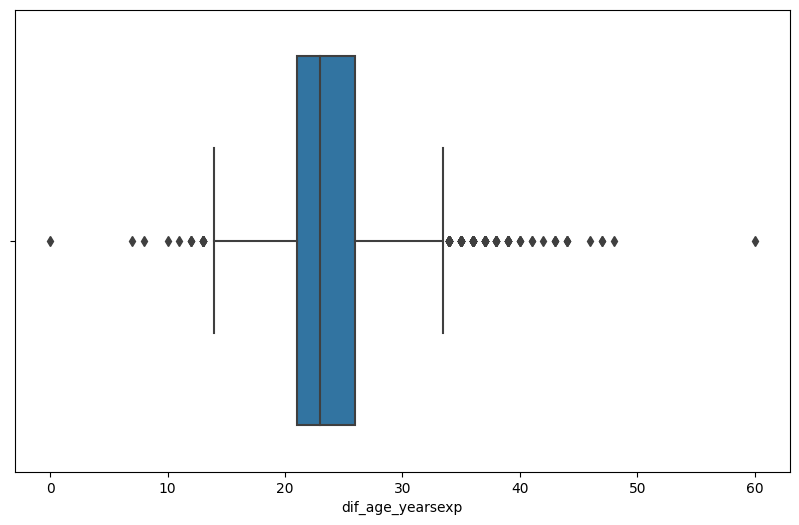

In [ ]:
df_red['dif_age_yearsexp'] = df_red['profile_age']-df_red['profile_years_experience']
plt.figure(figsize=(10, 6))
sns.boxplot(x='dif_age_yearsexp', data=df_red)

Podemos excluir, también, estos casos sospechosos suponiendo que la diferencia entre la edad y los años de experiencia debería ser, como mínimo, de 16 años.

<Axes: xlabel='profile_years_experience', ylabel='profile_age'>

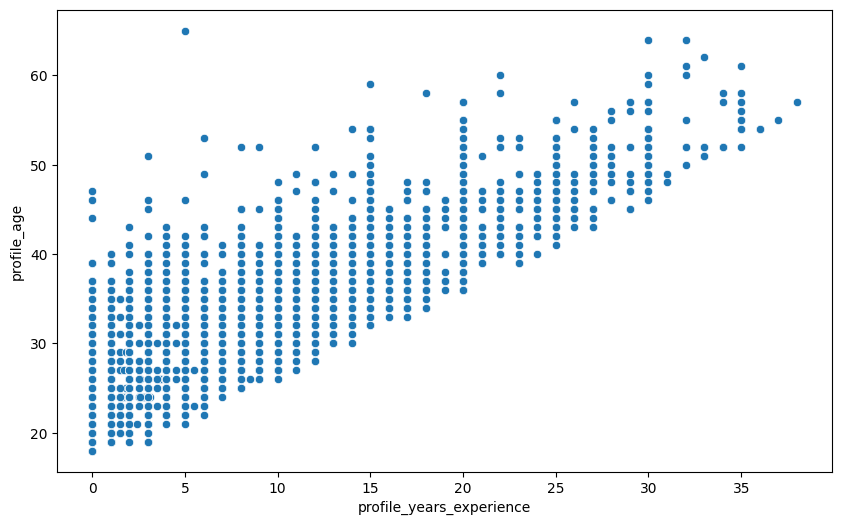

In [ ]:
df_red = df_red[df_red['dif_age_yearsexp'] > 15]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='profile_years_experience', y='profile_age', data=df_red)

También podemos relacionar los años de experiencia con el salario, así como la edad con el salario.

<Axes: xlabel='profile_years_experience', ylabel='salary_monthly_BRUTO'>

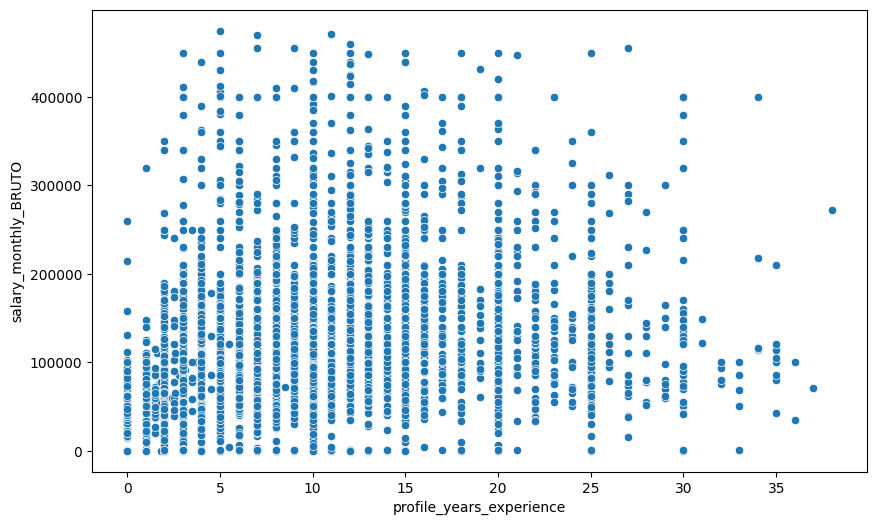

In [ ]:
# Gráfico de dispersión de años de experiencia y salario
plt.figure(figsize=(10, 6))
sns.scatterplot(x='profile_years_experience', y='salary_monthly_BRUTO', data=df_red)

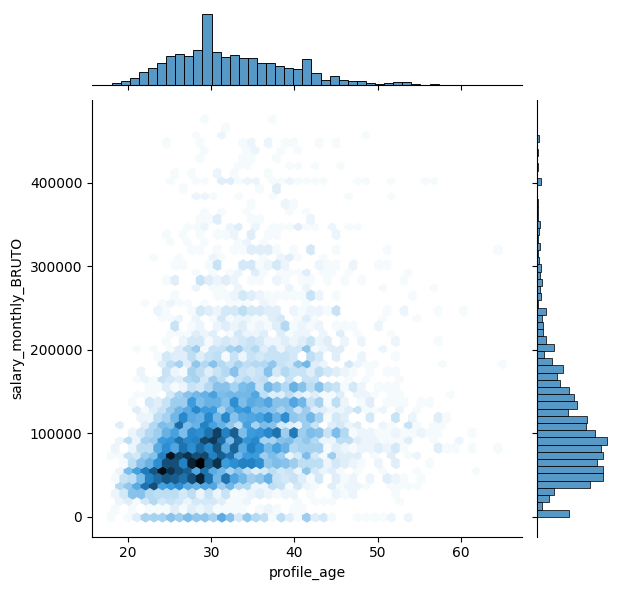

In [ ]:
# Distribución conjunta de salario y edad
sns.jointplot(data=df_red, x='profile_age', y='salary_monthly_BRUTO', kind='hex', height=6)
# Para remover la notación científica
plt.ticklabel_format(style='plain', axis='y')

La satisfacción con el salario, disponible en `salary_satisfaction` puede verse cruzada por el salario y por el género. Como es esperable, la mayor satisfacción se tiene para salrios altos, independientemente del género.





<Figure size 1200x600 with 0 Axes>

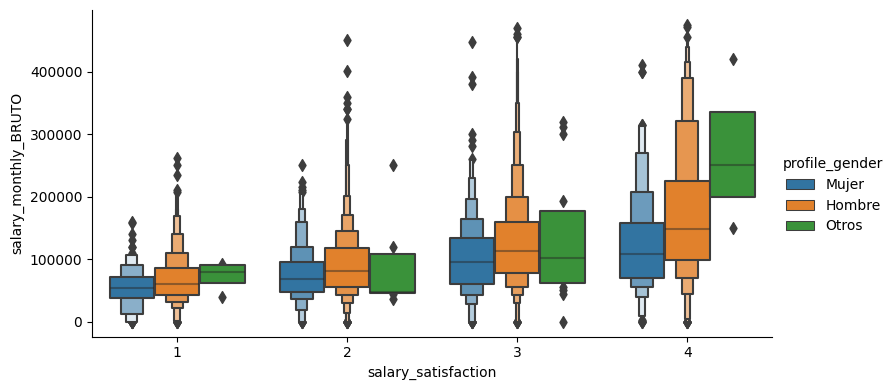

In [ ]:
plt.figure(figsize=(12, 6))
sns.catplot(data=df_red, y='salary_monthly_BRUTO', x='salary_satisfaction', height=4, aspect=2, kind= 'boxen', hue='profile_gender')

### Formulación de hipótesis

Luego de la exploración inicial, y del posible filtro que se haya hecho de los datos, es posible elaborar algunas conjeturas o hipótesis iniciales. Por ejemplo, hemos visto que el salario bruto mensual se ve muy influenciado por el género y por el nivel de estudios alcanzado o en curso.

El gráfico que sigue es una estimación de la densidad del salario bruto por género, que en el caso masculino exime una mayor asimetría que en el femenino, siendo este último, además, más corrido a izquierda.

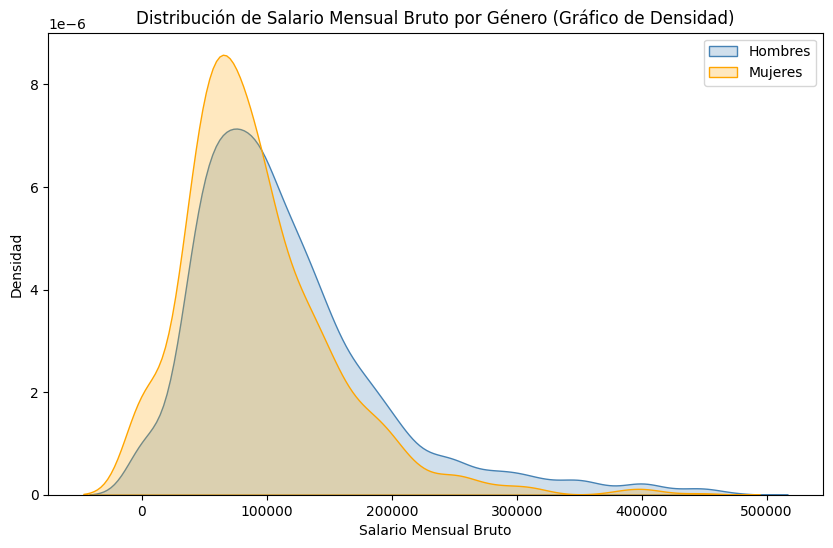

In [ ]:
df_H = df_red[df_red['profile_gender']=='Hombre']
df_M = df_red[df_red['profile_gender']=='Mujer']

plt.figure(figsize=(10, 6))
sns.kdeplot(df_H['salary_monthly_BRUTO'], color='steelblue', label='Hombres', fill=True)
sns.kdeplot(df_M['salary_monthly_BRUTO'], color='orange', label='Mujeres', fill=True)

plt.title('Distribución de Salario Mensual Bruto por Género (Gráfico de Densidad)')
plt.xlabel('Salario Mensual Bruto')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Algo similar ocurre con el nivel educativo.

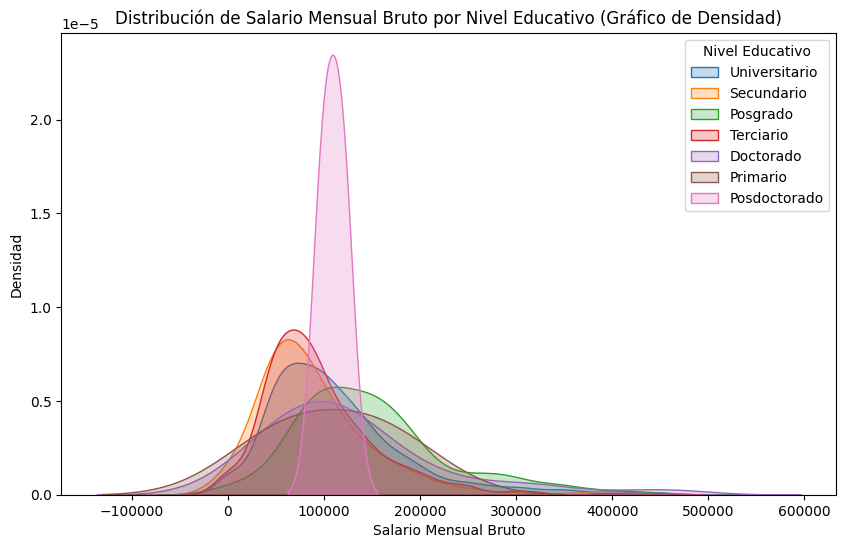

In [ ]:
plt.figure(figsize=(10, 6))

# Filtra los datos por nivel educativo
education_levels = df_red['profile_studies_level'].unique()

for level in education_levels:
    df_subset = df_red[df_red['profile_studies_level'] == level]
    sns.kdeplot(df_subset['salary_monthly_BRUTO'], label=level, fill=True)

plt.title('Distribución de Salario Mensual Bruto por Nivel Educativo (Gráfico de Densidad)')
plt.xlabel('Salario Mensual Bruto')
plt.ylabel('Densidad')
plt.legend(title='Nivel Educativo')
plt.show()

Sabemos que las muestras exhiben una variabilidad inherente al proceso de muestre. Sin embargo, podríamos preguntarnos si estas diferencias son razonablemente atribuibles al proceso de muestreo. Más precisamente, como sabemos que la media muestral tiene distribución aproximadamente normal cuando las muestras son "grandes" y conocemos la regla empírica 68-95-99, podríamos elaborar un primer razonamiento inferencial.

#### Intervalo de confianza para la media

Ya vimos que el **Teorema central del límite** (TCL) establece que, bajo hipótesis no muy rígidas sobre variables aleatorias $X_i$ (que sean independientes, que todas tengan la misma distribución y con esperanza $E(X)=\mu$ y varianza $V(X)=\sigma^2$ finitas), la distribución límite de la variable

$$
Z_n=\frac{\overline{X}_n-\mu}{\sigma/\sqrt{n}}
$$

es la distribución $N(0,1)$.

Es decir, cuando $n\longrightarrow \infty$,

$$
\frac{\overline{X}_n-\mu}{\sigma/\sqrt{n}} \stackrel{\mathcal{D}}{\longrightarrow} N(0,1).
$$

Naturalmente, el $n$ de cualquier experimento o simulación que hagamos nunca será infinito, sin embargo, el resultado anterior suele ser "bueno" aún para $n$ finitos y no muy grandes. Es decir, para un $n$ fijo y suficientemente grande,

$$\frac{\overline{X}_n-\mu}{\sigma/\sqrt{n}} \approx N(0,1),$$

donde el símbolo "$\approx$" denota que la distribución NO es exacta, sino aproximada.

Y, en esa línea, podemos pensar que para un $n$ fijo y suficientemente grande,

$$\overline{X}_n \approx N(\mu,\sigma^2/n).$$

Hilando más fino, con la distribución aproximada de $\overline{X}_n$ es posible construir intervalos de confianza para $\mu$. **¿Qué es un intervalo de confianza?**

Se llama intervalo de confianza a un par de números entre los cuales se estima que estará cierto valor desconocido respecto de un parámetro poblacional con un determinado nivel de confianza. Formalmente, estos números determinan un intervalo, que se calcula a partir de datos de una muestra, y el valor desconocido es un parámetro poblacional. El nivel de confianza representa el porcentaje de intervalos que tomados de 100 muestras independientes distintas contienen en realidad el valor desconocido.

Por ejemplo, dada una muestra de salarios, podríamos estimar que el verdadero salario bruto promedio $\mu$ de una población se encuentra entre los \$100.000 y los \$120.000 con un nivel de confianza del 95\%. Es decir, si repitiéramos esta encuesta 100 veces, en 95 de esas 100 veces esperaríamos estar "capturando" al verdadero $\mu$ de la población en este intervalo.

Un intervalo de nivel $1-\alpha$ para este problema se construye así:

$$\left[\overline{X}_n-z_{\alpha/2}\frac{S}{\sqrt{n}}; \overline{X}_n+z_{\alpha/2}\frac{S}{\sqrt{n}}\right]$$

donde $S$ es la desviación muestral y es la que estima a la verdadera desviación $\sigma$, que en este caso no es conocido; y $z_{\alpha/2}$ es el percentil que deja área $\alpha/2$ a derecha de una distribución normal estándar.

Por ejemplo, un intervalo de confianza de nivel $0.95$ exige un $\alpha$ de 0.05 que es el que determina el percentil $z_{0.05/2}=z_{0.025}$ y que se puede calcular como se muestra debajo.

In [ ]:
z = stats.norm.ppf((1 + 0.95) / 2)
z

1.959963984540054

Es decir, un intervalo de nivel $0.95$ para la media de salario bruto en este este problema sería

$$\left[\overline{X}_n-1.96\frac{S}{\sqrt{n}}; \overline{X}_n+1.96\frac{S}{\sqrt{n}}\right].$$

Podemos calcular un intervalo de confianza para la media de salario bruto como sigue.

In [ ]:
# Calcula la media y el error estándar estimado (S sobre sqrt n)
mean = df_red['salary_monthly_BRUTO'].mean()
std_error = df_red['salary_monthly_BRUTO'].std() / np.sqrt(len(df_red['salary_monthly_BRUTO']))

# Calcula el valor crítico de la distribución normal estándar para el nivel de confianza
conf_level = 0.95
z = stats.norm.ppf((1 + conf_level) / 2)

# Calcula el intervalo de confianza
lower_bound = mean - z * std_error
upper_bound = mean + z * std_error

print(lower_bound)
print(upper_bound)

109644.63433484998
113472.7490317942


Con los datos de salarios en el dataset que hemos reducido, entonces, podríamos concluir que un intervalo de nivel $0.95$ para la media de salario bruto es aproximadamente

$$\left[109.644; 113.472\right].$$

Pero, cuidado, ¡este salario medio supone una única población! No está considerando que pudiera haber diferencias por género, por nivel educativo o por cualquier otra consideración.


**¿Para qué podríamos usar esto?**

Podríamos, por ejemplo, ver cómo son los intervalos de confianza para el salario medio de las poblaciones por género o por nivel educativo y usar esos resultados para ver si los intervalos se solapan o no. Si se solapan, sería difícil suponer que las medias verdaderas son distintas. Sin embargo, si no se solaparan, todo parecería indicar que no es razonable suponer que son iguales (pues, de serlo, uno esperaría obtener intervalos "similares" en ambas poblaciones).

NOTA: esto es apenas un "coqueteo" con la estadística inferencial. En efecto, existen métodos mejores y más sofisticados que este simple esbozo para someter a prueba hipótesis estadísticas.

#### Sueldo medio según _genero_

Vamos a construir intervalos de confianza para las medias por género. Es decir, suponemos que hay dos medias
$$\mu_H, \quad \mu_M$$
donde la H y la M corresponden a los géneros "Hombre" y "Mujer", respectivamente. Descartamos el caso de "Otros" por tratarse de una muestra muy pequeña.

Si las medias fueran iguales
$$\mu_H = \mu_M$$
uno esperaría que los intervalos que se obtengan a partir de ambas muestras sean "parecidos".

Hagamos las cuentas que hicimos antes, pero para estas submuestras de hombres y mujeres.

In [ ]:
# Filtramos los datos para eliminar valores nulos y descarta el caso de "otros"
filtered_df = df_red[df_red['profile_gender'].isin(['Hombre', 'Mujer'])]
filtered_df = filtered_df.dropna(subset=['profile_gender', 'salary_monthly_BRUTO'])

# Creamos una lista para almacenar los resultados de los intervalos
results = []

# Definimos el nivel de confianza (por ejemplo, 95%)
conf_level = 0.95

# Iteramos a través de los géneros únicos y calculamos el intervalo de confianza
for gender in filtered_df['profile_gender'].unique():
    subset = filtered_df[filtered_df['profile_gender'] == gender]
    salary_data = subset['salary_monthly_BRUTO']

    # Calculamos la media y el error estándar estimado
    mean = salary_data.mean()
    std_error = salary_data.std() / np.sqrt(len(salary_data))

    # Calculamos el valor crítico de la distribución normal estándar para el nivel de confianza
    z = stats.norm.ppf((1 + conf_level) / 2)

    # Calculamos el intervalo de confianza
    lower_bound = mean - z * std_error
    upper_bound = mean + z * std_error

    results.append({'Género': gender, 'Media': mean, 'Intervalo de Confianza': (lower_bound, upper_bound)})

# Convertimos la lista de resultados en un DataFrame
result_df = pd.DataFrame(results)

# Imprimimos el DataFrame de resultados
print(result_df)

   Género          Media                    Intervalo de Confianza
0   Mujer   92148.909837    (88224.05923573015, 96073.76043839127)
1  Hombre  115128.963914  (112991.50907087304, 117266.41875758309)


¿Qué observamos?

*  Mujeres: La media del salario bruto para las mujeres es de aproximadamente \$92.149 con un intervalo de confianza entre \$88.224 y \$96.074. Esto indica que, con un nivel de confianza del 95\%, se espera que la verdadera media del salario bruto de las mujeres esté dentro de ese rango.

*  Hombres: La media del salario bruto para los hombres es de aproximadamente \$115.128 con un intervalo de confianza entre \$112.992 y \$117.266. Esto sugiere que la verdadera media del salario bruto de los hombres se encuentra dentro de ese intervalo con un 95\% de confianza.

**En base a estos resultados, podemos concluir que, en promedio, los hombres tienen un salario bruto mayor que las mujeres, ya que el intervalo de confianza de la media para los hombres no se superpone con el de las mujeres.**


Podríamos poner un nivel de confianza mayor, para aumentar la sensación de certeza. Por ejemplo: 99\%.

In [ ]:
# Creamos una lista para almacenar los resultados de los intervalos
results = []

# Definimos el nivel de confianza (por ejemplo, 95%)
conf_level = 0.99

# Iteramos a través de los géneros únicos y calculamos el intervalo de confianza
for gender in filtered_df['profile_gender'].unique():
    subset = filtered_df[filtered_df['profile_gender'] == gender]
    salary_data = subset['salary_monthly_BRUTO']

    # Calculamos la media y el error estándar estimado
    mean = salary_data.mean()
    std_error = salary_data.std() / np.sqrt(len(salary_data))

    # Calculamos el valor crítico de la distribución normal estándar para el nivel de confianza
    z = stats.norm.ppf((1 + conf_level) / 2)

    # Calculamos el intervalo de confianza
    lower_bound = mean - z * std_error
    upper_bound = mean + z * std_error

    results.append({'Género': gender, 'Media': mean, 'Intervalo de Confianza': (lower_bound, upper_bound)})

# Convertimos la lista de resultados en un DataFrame
result_df = pd.DataFrame(results)

# Imprimimos el DataFrame de resultados
result_df

,Género,Media,Intervalo de Confianza
0,Mujer,92148.909837,"(86990.78179455423, 97307.03787956719)"
1,Hombre,115128.963914,"(112319.87208195215, 117938.05574650397)"


Y si bien los intervalos obtenidos son más "largos", pues aumentamos la confianza con la que afirmamos esto, aun así siguien estando separados, no se solapan. Es decir, la conclusión no cambia.

#### Sueldo medio según _genero_ para _nivel universitario completo_



Como todo en estadística, ninguna conclusión es una verdad absoluta. Simplemente se trata de una conclusión a la que se llega con un procedimiento válido desde la teoría, y que surge a parti de los datos recabados, que tampoco constituye un muestreo estadístico que garantice independencia, representatividad, etcétera.

No obstante, a partir de los datos hay evidencia para suponer que el salario bruto mensual PROMEDIO de las mujeres es inferior al salario bruto mensual PROMEDIO de los hombres.

Ahora bien, uno podría pensar, por ejemplo, que esa diferencia observada no se debe al género, sino a alguna otra variable latente que pudiera haber. Solo por mencionar una, quizás ocurre que la muestra de los hombres tiene casos de encuestados con mayor formación y, por ende, con salarios mejores.

Podríamos, entonces, replicar el análisis anterior pero controlando por el nivel universitario: por ejemplo, quedándonos únicamente con los datos de hombres y mujeres con nivel universitario completo.

In [ ]:
# Filtramos los datos para eliminar valores nulos y para incluir solo hombres y mujeres universitarios con estudios completos
filtered_df = df_red.dropna(subset=['profile_gender', 'salary_monthly_BRUTO', 'profile_studies_level', 'profile_studies_level_state'])
filtered_df = filtered_df[(filtered_df['profile_studies_level'] == 'Universitario') &
                          (filtered_df['profile_studies_level_state'] == 'Completado') &
                          (filtered_df['profile_gender'].isin(['Hombre', 'Mujer']))]

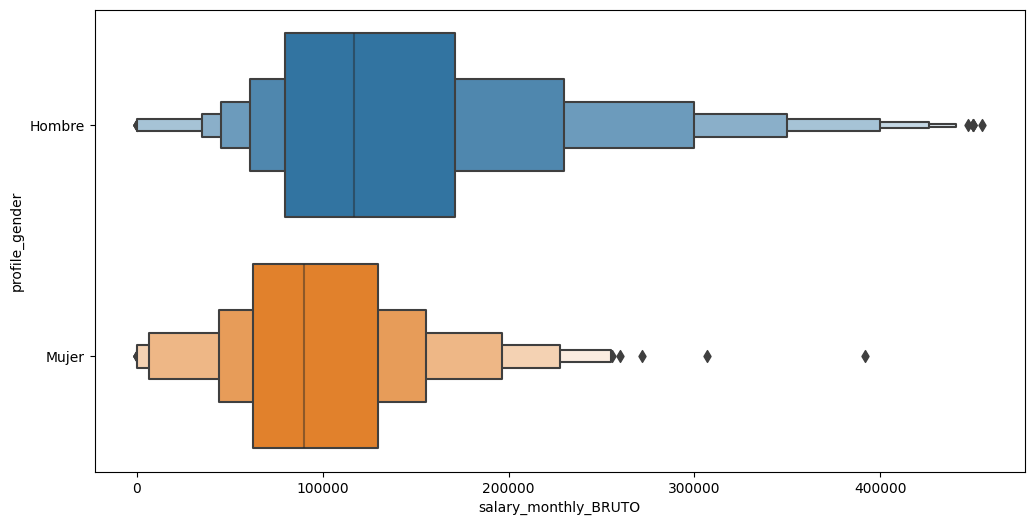

In [ ]:
# Boxplot del salario mensual bruto por género para universitario completo
plt.figure(figsize=(12, 6))
sns.boxenplot(data=filtered_df, x='salary_monthly_BRUTO', y='profile_gender')
plt.ticklabel_format(style='plain', axis='x')

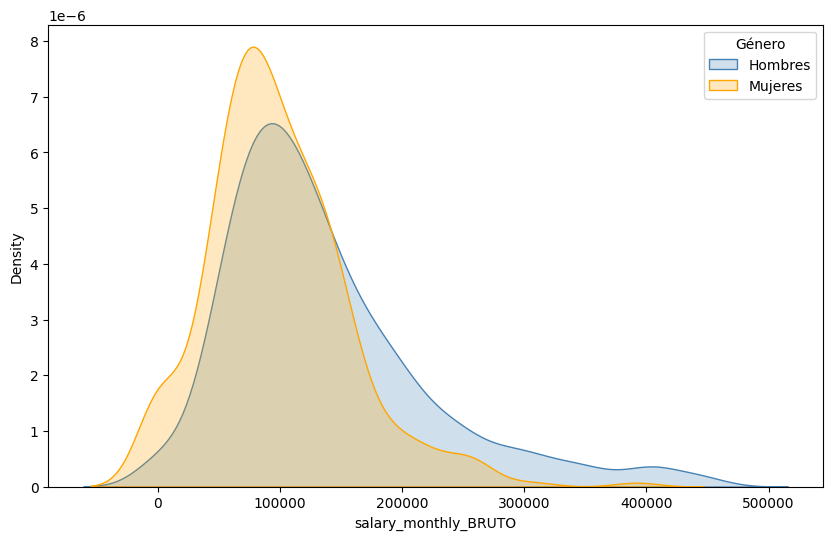

In [ ]:
# Densidad del salario mensual bruto por género para universitario completo
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_df[filtered_df['profile_gender'] == 'Hombre']['salary_monthly_BRUTO'], color='steelblue', label='Hombres', fill=True)
sns.kdeplot(filtered_df[filtered_df['profile_gender'] == 'Mujer']['salary_monthly_BRUTO'], color='orange', label='Mujeres', fill=True)
plt.legend(title='Género')
plt.show()

In [ ]:
# Repetimos el cálculo del IC
results = []

conf_level = 0.95

for gender in ['Hombre', 'Mujer']:
    subset = filtered_df[filtered_df['profile_gender'] == gender]
    salary_data = subset['salary_monthly_BRUTO']

    # Calcula la media y el error estándar estimado
    mean = salary_data.mean()
    std_error = salary_data.std() / np.sqrt(len(salary_data))

    # Calcula el valor crítico de la distribución normal estándar para el nivel de confianza
    z = stats.norm.ppf((1 + conf_level) / 2)

    # Calcula el intervalo de confianza
    lower_bound = mean - z * std_error
    upper_bound = mean + z * std_error

    results.append({'Género': gender, 'Media': mean, 'Intervalo de Confianza': (lower_bound, upper_bound)})

result_df = pd.DataFrame(results)
result_df

,Género,Media,Intervalo de Confianza
0,Hombre,136668.580040,"(131990.81606918952, 141346.3440107465)"
1,Mujer,98630.173185,"(92233.35976623662, 105026.98660319013)"


Nuevamente, los intervalos no se solapan y la conclusión no cambia. Es decir:

**En base a estos resultados, podemos concluir que, en promedio y a nivel 95%, los hombres con nivel universitario completo tienen un salario mensual bruto mayor que las mujeres con nivel universitario completo.**


#### Sueldo medio según _genero_ para _nivel universitario completo_ y menos de 10 años de experiencia

Podríamos, por último, replicar el análisis anterior pero controlando no solo por el nivel universitario sino por los años de experiencia: por ejemplo, quedándonos únicamente con los datos de hombres y mujeres con nivel universitario completo y con menos de 10 años de experiencia.

In [ ]:
# Filtramos los datos para eliminar valores nulos y para incluir solo hombres y mujeres universitarios con estudios completos
filtered_df = df_red.dropna(subset=['profile_gender', 'salary_monthly_BRUTO', 'profile_studies_level', 'profile_studies_level_state'])
filtered_df = filtered_df[(filtered_df['profile_studies_level'] == 'Universitario') &
                          (filtered_df['profile_studies_level_state'] == 'Completado') &
                          (filtered_df['profile_years_experience'] < 10) &
                          (filtered_df['profile_gender'].isin(['Hombre', 'Mujer']))]

Es importante verificar que sigamos teniendo suficientes datos como para que el intervalo que se basa en la aproximación normal siga siendo razonable.

In [ ]:
len(filtered_df[filtered_df['profile_gender']=='Mujer'])

193

In [ ]:
len(filtered_df[filtered_df['profile_gender']=='Hombre'])

661

In [ ]:
# Repetimos el cálculo del IC
results = []

conf_level = 0.95

for gender in ['Hombre', 'Mujer']:
    subset = filtered_df[filtered_df['profile_gender'] == gender]
    salary_data = subset['salary_monthly_BRUTO']

    # Calcula la media y el error estándar estimado
    mean = salary_data.mean()
    std_error = salary_data.std() / np.sqrt(len(salary_data))

    # Calcula el valor crítico de la distribución normal estándar para el nivel de confianza
    z = stats.norm.ppf((1 + conf_level) / 2)

    # Calcula el intervalo de confianza
    lower_bound = mean - z * std_error
    upper_bound = mean + z * std_error

    results.append({'Género': gender, 'Media': mean, 'Intervalo de Confianza': (lower_bound, upper_bound)})

result_df = pd.DataFrame(results)
result_df

,Género,Media,Intervalo de Confianza
0,Hombre,114392.052905,"(108725.42142187308, 120058.68438750664)"
1,Mujer,85873.940984,"(78903.23764918625, 92844.64431972566)"


Nuevamente, los intervalos no se solapan y la conclusión no cambia. Es decir:

**En base a estos resultados, podemos concluir que, en promedio y a nivel 95%, los hombres con nivel universitario completo y menos de 10 años de experiencia tienen un salario mensual bruto mayor que las mujeres con nivel universitario completo y menos de 10 años de experiencia.**

# Trabajo de simulación 3

Para el último trabajo de simulación, vamos a hacer un análisis de datos a partir de la encuesta de salarios de Sysarmy del primer trimestre de 2025 (si están publicados los del segundo trimestre o posterior, podemos usar esos).

Los datos oficiales se encuentran [acá](https://docs.google.com/spreadsheets/d/1hlLwv9SLJvrnsTq_UsEAHkHGNiziH7IdT1lJd4fq6kU/edit?gid=1462536742#gid=1462536742). Por si en algún momento el enlace se cae o cambia de ubicación, una versión descargada el 5 de marzo de 2025 puede encontrarse [acá](https://docs.google.com/spreadsheets/d/1Vq9F6xE03fR0x6pXlRMDN_bww7NWItjMW0U89qV3AvM/edit?usp=sharing).

Las consignas de este trabajo no son tan dirigidas como las de los trabajos anteriores, pues en el análisis de datos, siempre hay libertad y margen para la creatividad y la producción personal. Sin embargo, les compartimos algunas pautas de lo que debe tener, como mínimo, este trabajo.

Pautas generales y **OBLIGATORIAS** para la aprobación de la entrega:

*   Debe replicarse, como mínimo, un análisis similar al aquí presentado para los datos del 2020.

*   Debe escribirse en formato "informe", es decir, no se trata de exhibir código y gráficos, sino de explicar qué se observa y por qué es relevante observar eso. El informe es requisito **excluyente**. No se aprueba el trabajo de simulación sin él. Este informe breve debe entregarse en un word/pdf, en esta entrega **NO** se evalúa el colab, sino el reporte.

*   El trabajo debe contener, como mínimo, **una conjetura que sea sometida a prueba y de la que se exhiba alguna conclusión fundamentada**, como se hizo en el caso de los datos de 2020 para el salario medio bruto por género y para hombres y mujeres con nivel universitario completo. Por ejemplo, frente a la pregunta de si el salario medio de mujeres y hombres es igual, podríamos poner en práctica lo que estudiamos sobre convergencia para, de alguna forma, darnos una idea de cuán probable es observar lo que efectivamente estamos observando. Este es un "coqueteo" con la estadística inferencial, que no estudiamos formalmente en la materia, pero que es válido comenzar a encarar con todo lo que hemos estudiado.

El resto de la producción queda a criterio de los grupos. Esperamos que haya un interés genuino en tratar de extraer información a partir de estos datos. ¡Muchos éxitos!

**PD: El formato "informe" puede ser cambiado por el formato "póster" si es que así prefieren.**